<a href="https://colab.research.google.com/github/shan2312/Project-1/blob/master/EVA_S1_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

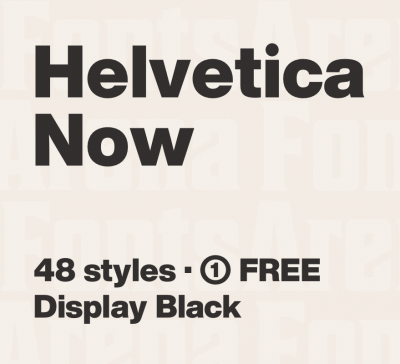

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

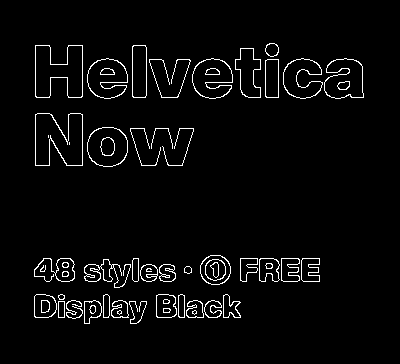

In [0]:
cv2_imshow(edges)

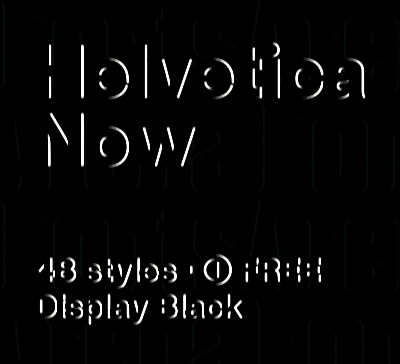

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

### 1) Horizontal Kernel:
A Horizontal Edge detector should capture any gradient change in vertical direction. Once such kernel can be the one which is dark in the first row
and light in the last row. This kernel will be a transpose of the vertical edge detector.

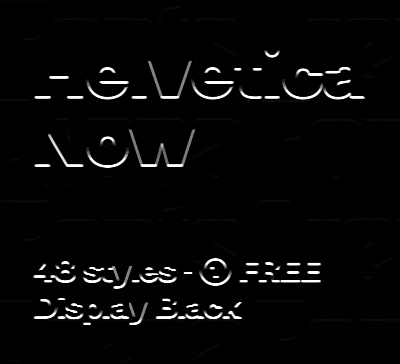

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel_horizontal = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])


dst_horizontal = cv2.filter2D(image,-1,kernel_horizontal)
# Apply filter
cv2_imshow(dst_horizontal)
# Display Image

### 2) 45 degree Edge Detector - 
A 45 degree Edge detector should capture gradient change along the diagonal. One such kernel can be the one which is dark in the upper left triangle
and light in the lower right triangle of pixel intensity matrix.

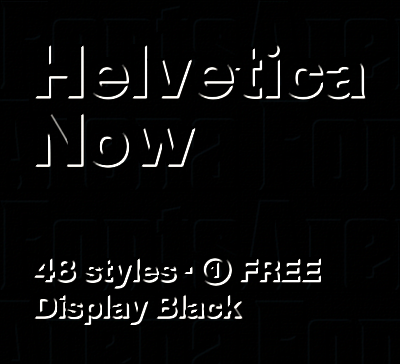

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel_inclined = np.float32([[-1,-1,0],[-1,0,1],[0,1,1]])
 

dst_inclined = cv2.filter2D(image,-1,kernel_horizontal)
# Apply filter
cv2_imshow(dst_horizontal)
# Display Image

### 3) Blur Kernel:
A blur kernel should decrease the distinguishability of each pixel which would translate to decreasing the contrast.On such kernel can be the one which takes an average of pixel values in and around the surroundings of each pixel

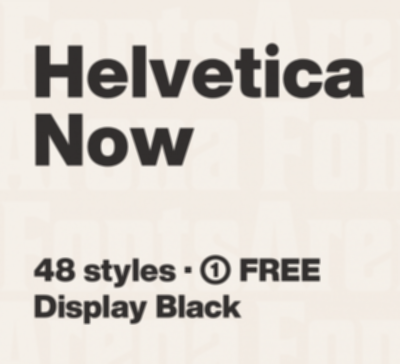

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel_blur = np.float32([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
# 45 degree Edge Detector - A 45 degree Edge detector should capture gradient change along the diagonal. One such kernel can be the one which is dark in the lower left triangle
# and light in the upper right triangle. 

dst_blur = cv2.filter2D(image,-1,kernel_blur)
# Apply filter
cv2_imshow(dst_blur)
# Display Image

### 4) Sharpen Kernel
A Sharpen kernel should increase distinguishability and hence the contrast. One such kernel can be the one which has higher positive value in the middle.

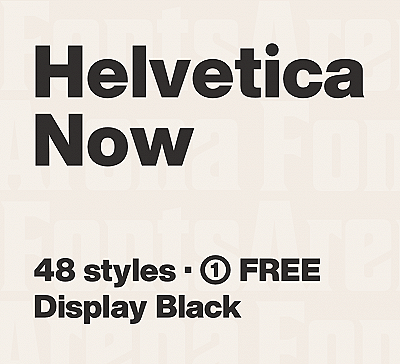

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel_sharp = np.float32([[0,-0.5,0],[-0.5,3,-0.5],[0,-0.5,0]])
# 45 degree Edge Detector - A 45 degree Edge detector should capture gradient change along the diagonal. One such kernel can be the one which is dark in the lower left triangle
# and light in the upper right triangle. 

dst_sharp = cv2.filter2D(image,-1,kernel_sharp)
# Apply filter
cv2_imshow(dst_sharp)
# Display Image

### 5) Identity Kernel:
This type of kernel should return the same pixel intensity for each pixel. One such kernel can be as shown below.

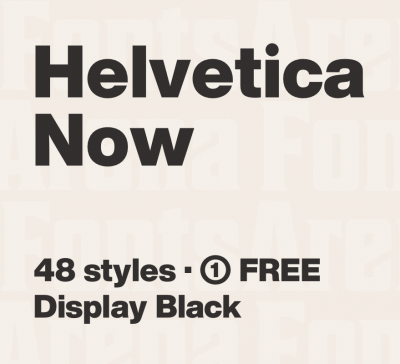

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel_blur = np.float32([[0,0,0],[0,1,0],[0,0,0]])


dst_blur = cv2.filter2D(image,-1,kernel_blur)
# Apply filter
cv2_imshow(dst_blur)
# Display Image